# The Business Problem and the explanation of the data
###The task is to develop a machine learning model to predict which customers are likely to leave the company. This problem is crucial because understanding and anticipating customer churn can help the company take proactive measures to retain customers, thereby reducing revenue loss. By identifying at-risk customers early, the company can implement targeted retention strategies, improve customer satisfaction, and enhance overall profitability.

The X customer churn data contains information about a fictional telecommunications company providing home phone and internet services to 7043 customers in California during the third quarter. It shows which customers have left the service, stayed, or signed up for the service. The dataset includes 21 variables and 7043 observations with a size of 977.5 KB.

CustomerId: Customer ID
Gender: Gender
SeniorCitizen: Whether the customer is a senior citizen (1, 0)
Partner: Whether the customer has a partner (Yes, No)
Dependents: Whether the customer has dependents (Yes, No)
tenure: Number of months the customer has stayed with the company
PhoneService: Whether the customer has phone service (Yes, No)
MultipleLines: Whether the customer has multiple lines (Yes, No, No phone service)
InternetService: Customer's internet service provider (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
OnlineBackup: Whether the customer has online backup (Yes, No, No internet service)
DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
TechSupport: Whether the customer has tech support (Yes, No, No internet service)
StreamingTV: Whether the customer has streaming TV (Yes, No, No internet service)
StreamingMovies: Whether the customer has streaming movies (Yes, No, No internet service)
Contract: Customer's contract term (Month-to-month, One year, Two years)
PaperlessBilling: Whether the customer has paperless billing (Yes, No)
PaymentMethod: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges: Amount charged to the customer monthly
TotalCharges: Total amount charged to the customer
Churn: Whether the customer churned (Yes or No)









In [1]:
# Importing necessary library
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
import sklearn.metrics
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import RocCurveDisplay

# ignoring the FutureWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# TASK 1 : Exploratory Data Analysis


In [2]:
# Loading Data
def load():
    df_ = pd.read_csv("/kaggle/input/churn-data/Telco-Customer-Churn.csv")
    data = df_.copy()
    return data


In [3]:
df = load()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [5]:

# Function to check dataframe
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Descriptive Statistics #####################")
    print(dataframe.describe().T)


In [6]:
# Check the dataframe
check_df(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling          

In [7]:
# Step 1: Capture numerical and categorical variables.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Gives the names of categorical, numerical, and cardinal but categorical variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe whose variable names are to be obtained
        cat_th: int, optional
                Class threshold for numerical but categorical variables
        car_th: int, optional
                Class threshold for cardinal but categorical variables
    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of cardinal but categorical variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
        The total of the returned 3 lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """
    # Categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # Numerical-looking categorical variables
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    # Cardinal but categorical variables
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat  # Update categorical variables by adding numerical-looking categorical variables
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Update cat_cols by excluding cardinal but categorical variables
    # Numerical variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]  # Get non-object type variables
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Exclude numerical-looking categorical variables

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Number of Variables[(1)+(2)+(3)]: {dataframe.shape[1]}")
    print(f"----->(1):Number of Categorical Variables: {len(cat_cols)}")
    print(f"        ----->(Number of Numerical-type_but Categorical Variables): {len(num_but_cat)}")
    print(f"----->(2):Number of Numerical Variables: {len(num_cols)}")
    print(f"----->(3):Number of Cardinal Variables: {len(cat_but_car)}")
    print("****************************************************************")
    print(f"Categorical Variables: {cat_cols}")
    print(f"----->Numerical-type_but Categorical Variables: {num_but_cat}")
    print(f"Numerical Variables: {num_cols}")
    print(f"Cardinal Variables: {cat_but_car}")

    return cat_cols, num_cols, cat_but_car

# Capture column names
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 7043
Number of Variables[(1)+(2)+(3)]: 21
----->(1):Number of Categorical Variables: 17
        ----->(Number of Numerical-type_but Categorical Variables): 1
----->(2):Number of Numerical Variables: 2
----->(3):Number of Cardinal Variables: 2
****************************************************************
Categorical Variables: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']
----->Numerical-type_but Categorical Variables: ['SeniorCitizen']
Numerical Variables: ['tenure', 'MonthlyCharges']
Cardinal Variables: ['customerID', 'TotalCharges']


In [8]:
# Step 2: Make necessary adjustments. (Variables with type errors, etc.)
# Replace spaces with NaN
df["TotalCharges"] = df["TotalCharges"].replace({' ': np.nan})

# Convert column types
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

# Recheck column names
cat_cols, num_cols, cat_but_car = grab_col_names(df)

# View the DataFrame again
#print(df)

Observations: 7043
Number of Variables[(1)+(2)+(3)]: 21
----->(1):Number of Categorical Variables: 17
        ----->(Number of Numerical-type_but Categorical Variables): 0
----->(2):Number of Numerical Variables: 3
----->(3):Number of Cardinal Variables: 1
****************************************************************
Categorical Variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
----->Numerical-type_but Categorical Variables: []
Numerical Variables: ['tenure', 'MonthlyCharges', 'TotalCharges']
Cardinal Variables: ['customerID']


Summary Statistics of Numerical Variables:
count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


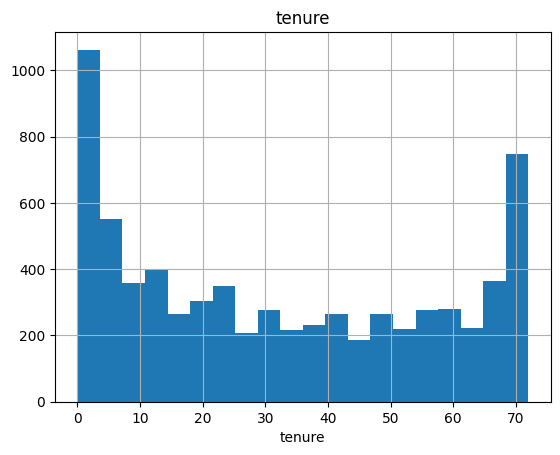

Summary Statistics of Numerical Variables:
count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


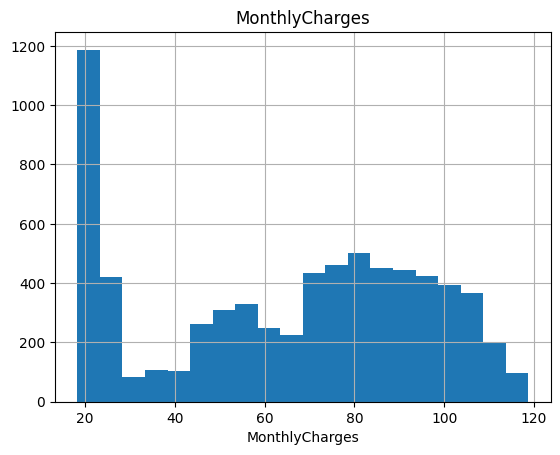

Summary Statistics of Numerical Variables:
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


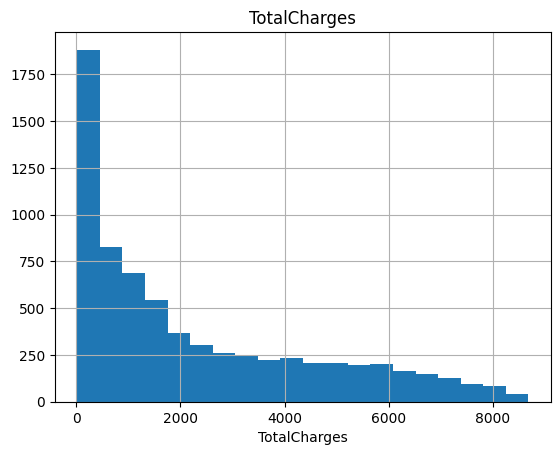

In [9]:
# Step 3: Observe the distribution of numerical and categorical variables.
# Summary statistics of numerical variables
def num_summary(dataframe, numerical_col, plot=False):
    print("Summary Statistics of Numerical Variables:")
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

# Plot numerical summaries
for col in num_cols:
    num_summary(df, col, plot=True)


        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
##########################################


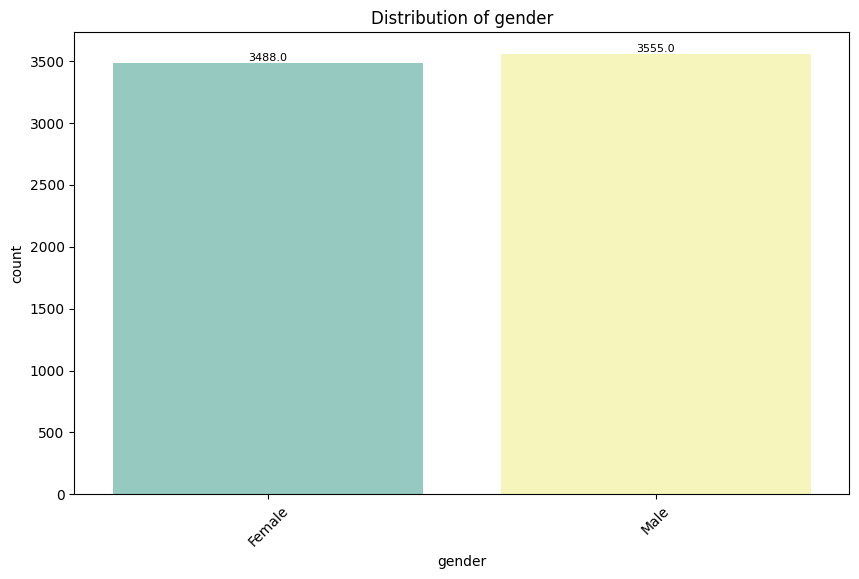

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
##########################################


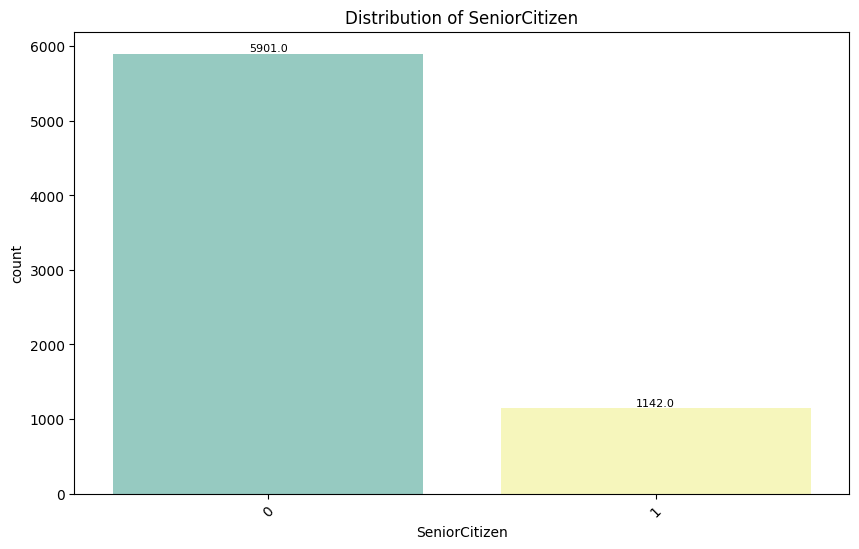

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
##########################################


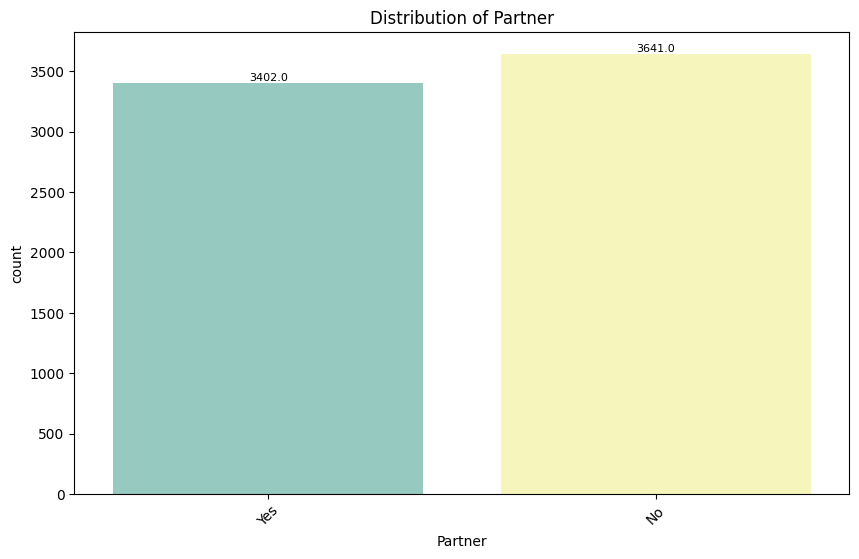

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
##########################################


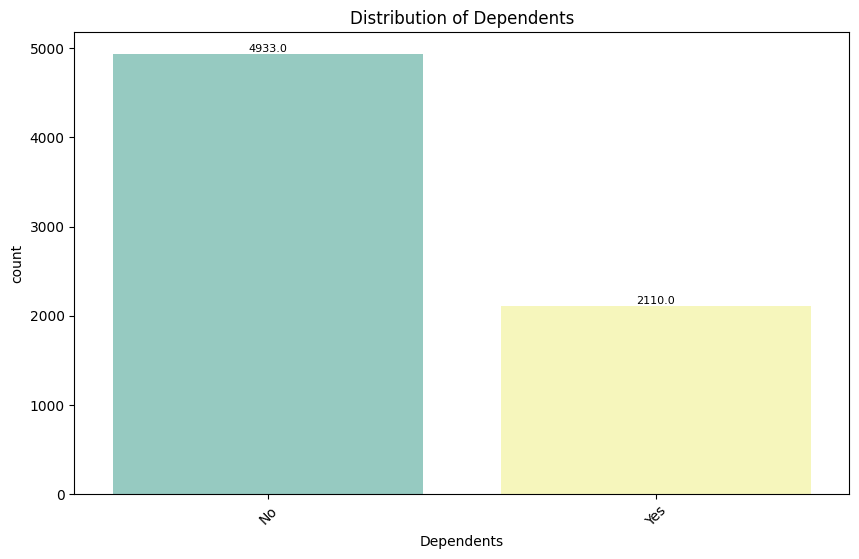

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
##########################################


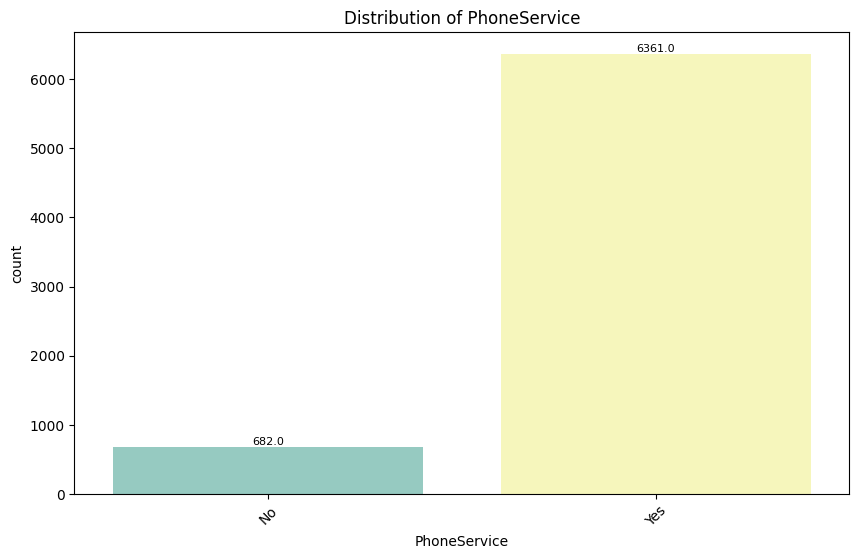

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
##########################################


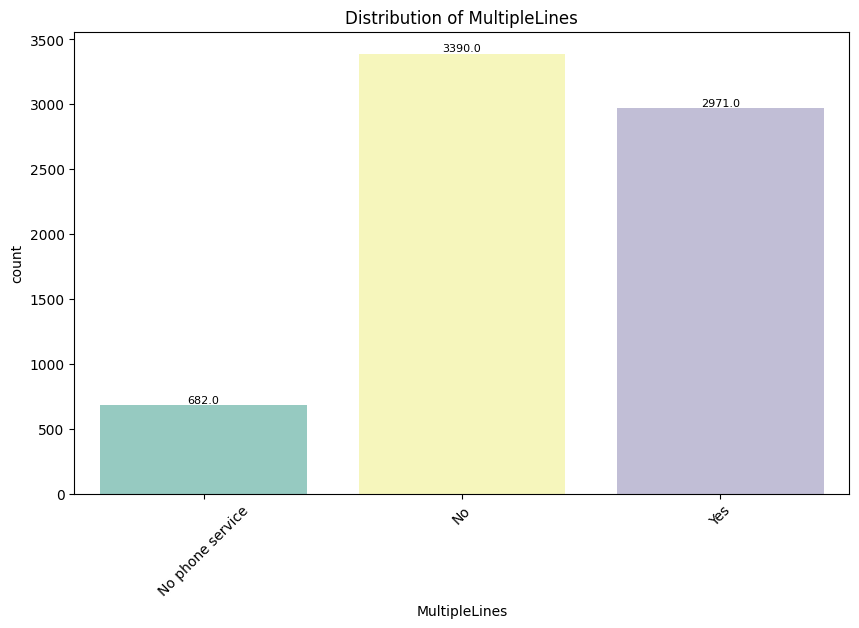

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
##########################################


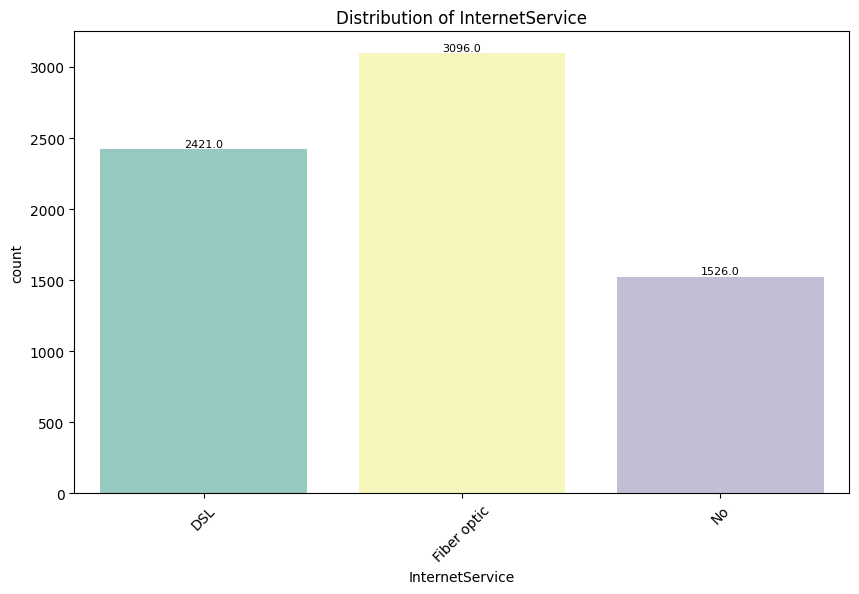

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
##########################################


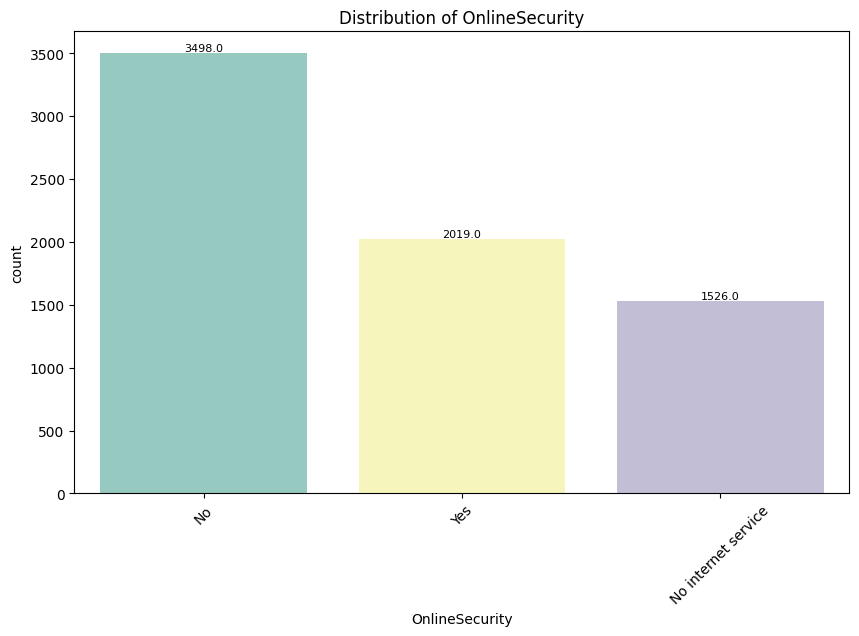

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
##########################################


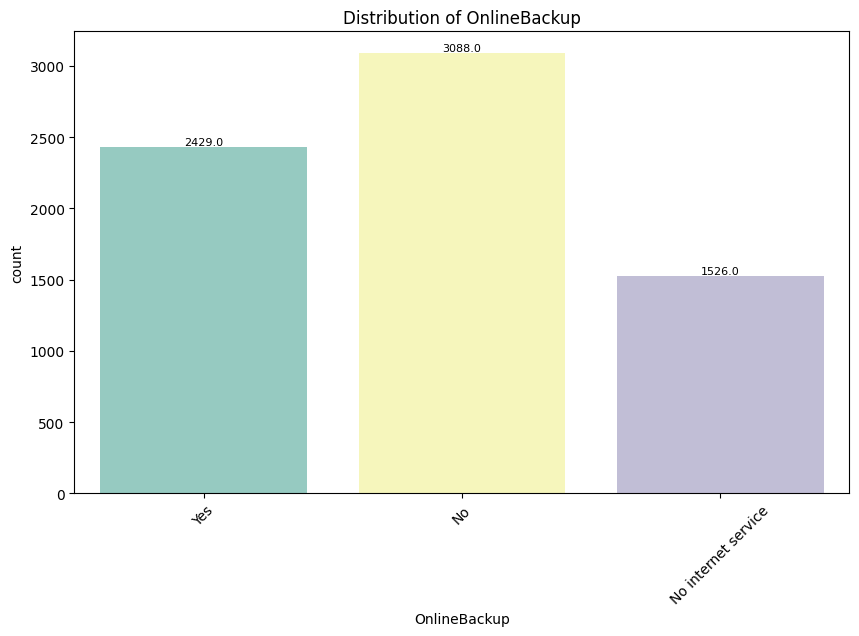

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
##########################################


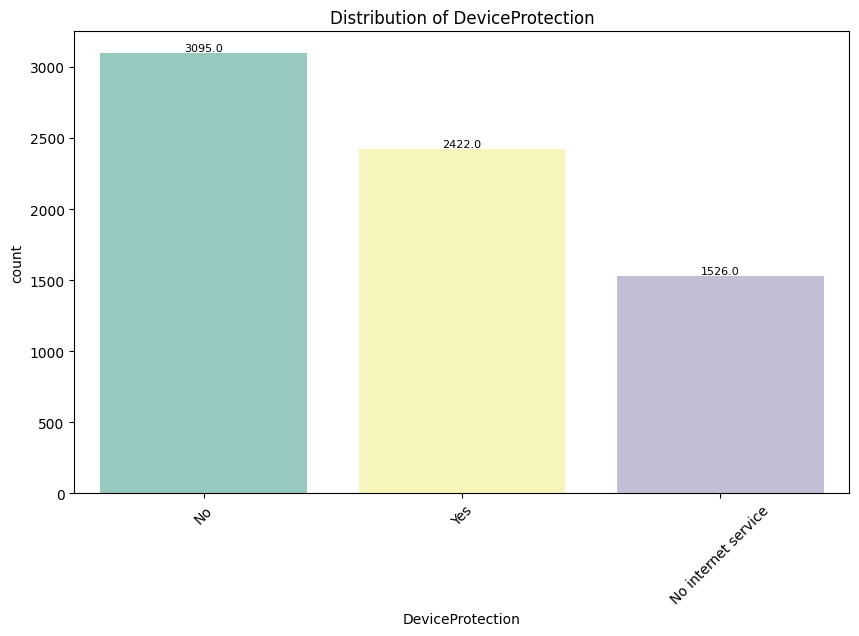

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
##########################################


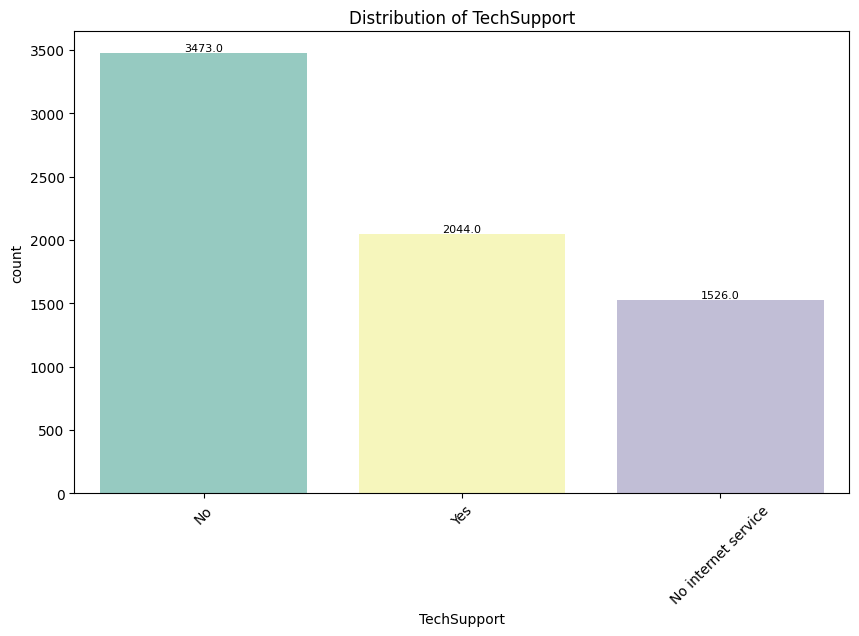

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
##########################################


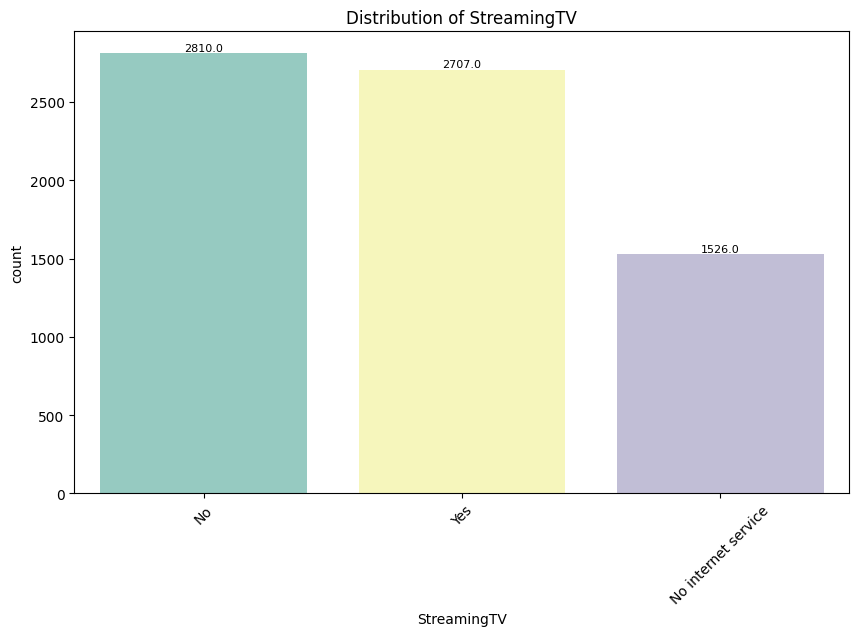

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
##########################################


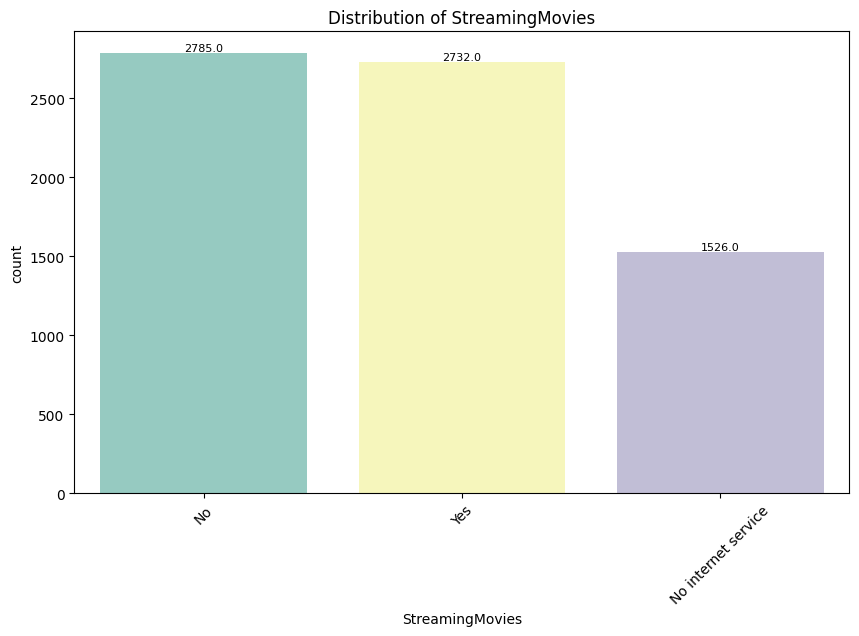

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
##########################################


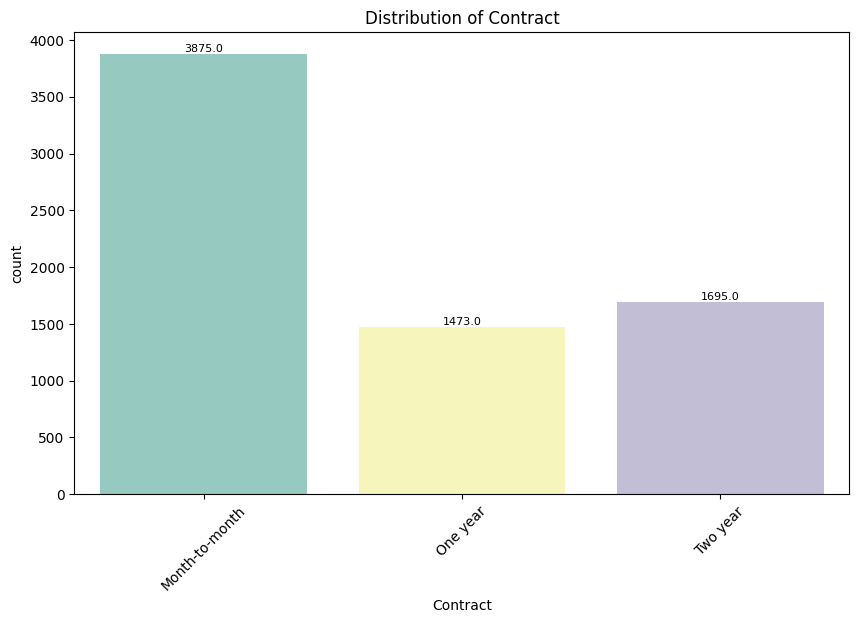

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
##########################################


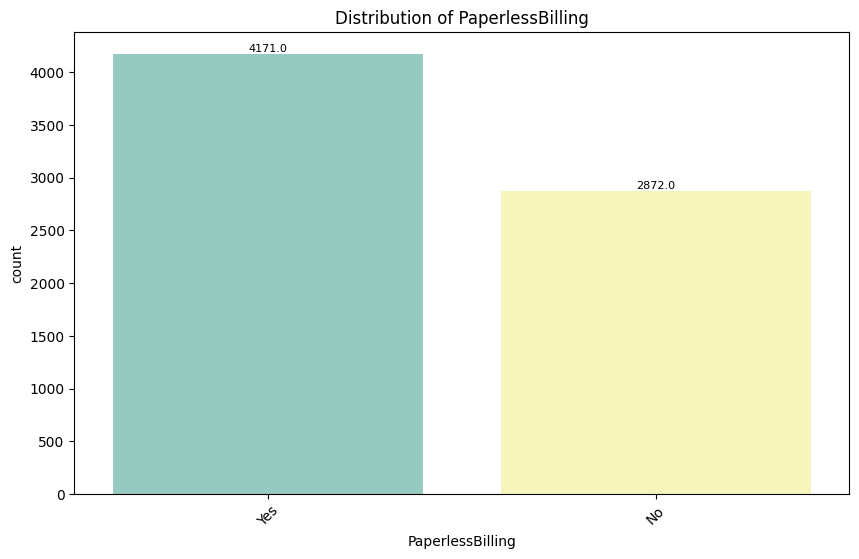

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
##########################################


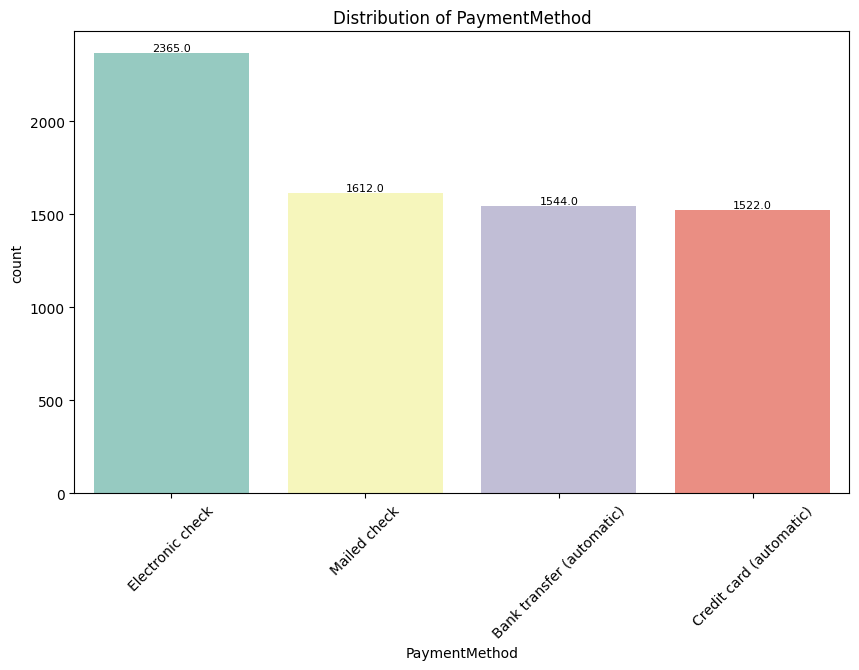

       Churn  Ratio
Churn              
No      5174 73.463
Yes     1869 26.537
##########################################


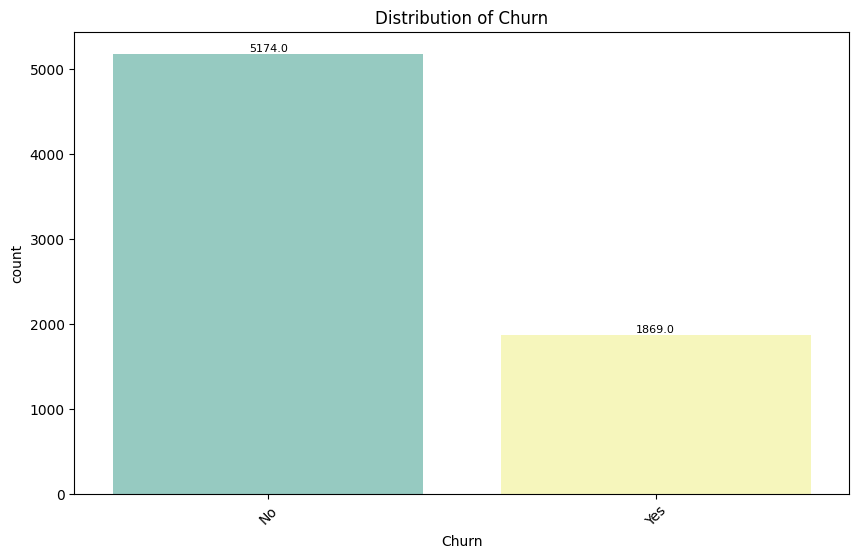

              customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
gender Churn                                                                                                                                                                                                                                                                          
Female No           2549           2549     2549        2549    2549          2549           2549             2549            2549          2549              2549         2549         2549             2549      2549              2549           2549            2549          2544
       Yes           939            939      939         939     939           939            939              939             939           939               939 

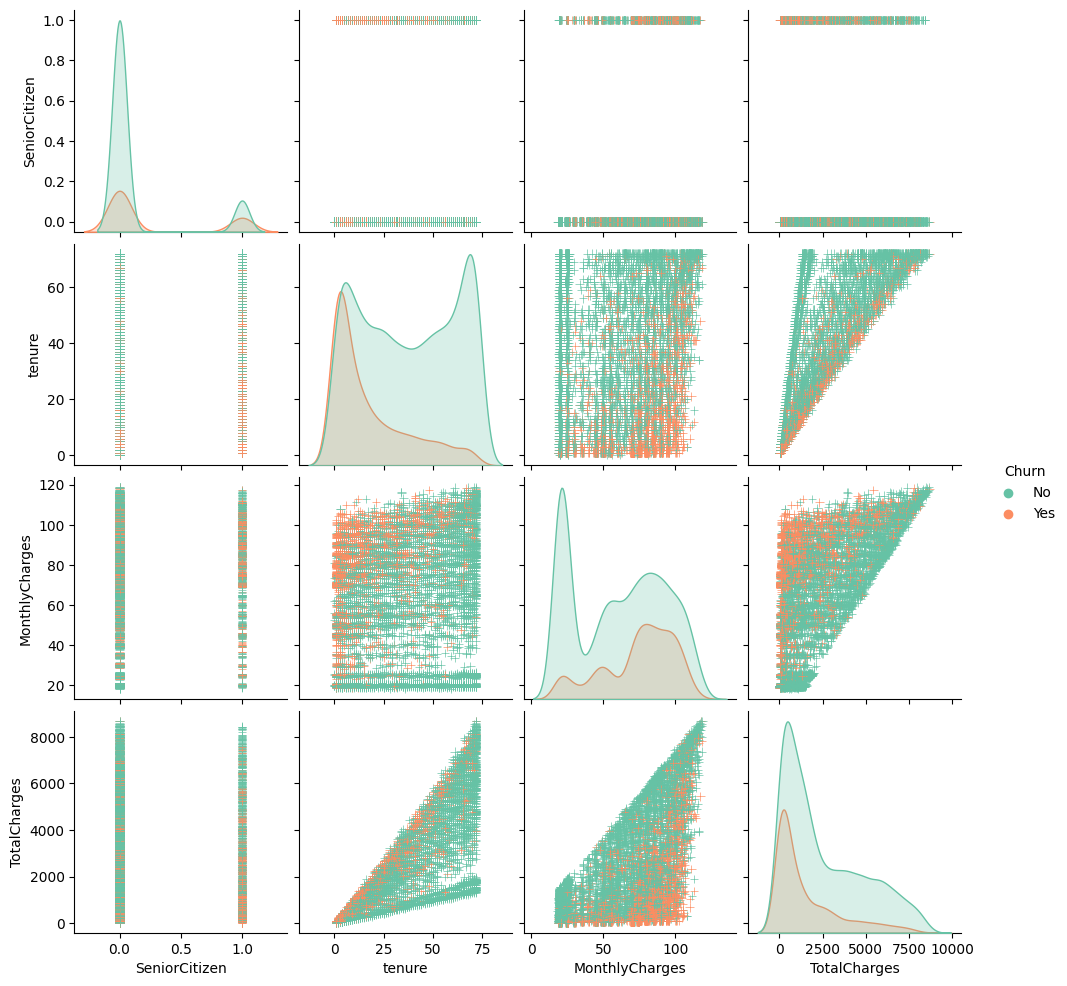

In [10]:
# Step 4: Visualize distribution of categorical variables
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=dataframe, x=col_name, palette="Set3")
        plt.title(f'Distribution of {col_name}')
        plt.xticks(rotation=45)
        # Annotate frequencies on each bar
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'\n{p.get_height()}', ha='center', va='bottom', fontsize=8, color='black')
        plt.show()

# Plot categorical summaries
for col in cat_cols:
    cat_summary(df, col, plot=True)

for col in cat_cols:
    print(df.groupby([col, 'Churn']).count())

# Pairplot for selected numerical variables
sns.pairplot(df, diag_kind="kde", markers="+", palette="Set2", hue="Churn")
plt.show()


In [11]:
# Step 5: Check for outliers.
# *********************************************************************************

def outliers_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1  # interquartile range
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    return low_limit, up_limit

def check_outliers(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outliers_thresholds(dataframe, col_name)
    # Check for outliers
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False


# check_outliers(df, num_cols)

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outliers_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [12]:
# Step 6: Check for missing values.
# *********************************************************************************
df.isnull().sum().any()
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# TASK 2: Feature Engineering

In [13]:
# Step 1: Handle missing and outlier values.
# Example: Filling missing values with the mean
df["TotalCharges"].replace(0, np.nan, inplace=True)
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
# Step 2: Create new features.
df['ServiceCount'] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda row: row == 'Yes', axis=1).sum(axis=1)
df["FemaleSeniorCitizen"] = df["gender"].map({"Female": 1, "Male": 0}) * df["SeniorCitizen"]
df["tenure"].replace(0, np.nan, inplace=True)
df["tenure"].fillna(1, inplace=True)
df['AverageMonthlyBill'] = df['TotalCharges'] / df['tenure']
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in services:
    df[f'{service}_CostPerService'] = df['TotalCharges'] * (df[service] == 'Yes')
df['AverageServiceCost'] = df[[f'{service}_CostPerService' for service in services]].sum(axis=1)


In [15]:
# Step 3: Perform encoding.
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, ohe_cols)
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if "customerID" not in col]


Observations: 7043
Number of Variables[(1)+(2)+(3)]: 47
----->(1):Number of Categorical Variables: 35
        ----->(Number of Numerical-type_but Categorical Variables): 35
----->(2):Number of Numerical Variables: 11
----->(3):Number of Cardinal Variables: 1
****************************************************************
Categorical Variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'FemaleSeniorCitizen', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (auto

In [16]:
# Step 4: Standardize numerical variables.
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


# TASK 3: Modeling


In [17]:
# Step 1: Build classification model
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

log_model = LogisticRegression().fit(X, y)
y_pred = log_model.predict(X)
print(classification_report(y, y_pred))
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5174
           1       0.67      0.55      0.60      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.73      0.74      7043
weighted avg       0.80      0.81      0.80      7043



0.8492063147362113

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1030
           1       0.67      0.52      0.58       379

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



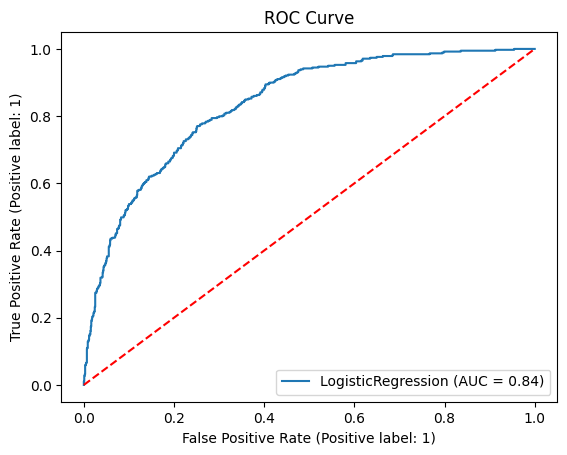

In [18]:
# Step 2: Perform hyperparameter optimization and retrain the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
log_model = LogisticRegression().fit(X_train, y_train)
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()


# Summary of This Work

Customer Churn Prediction Analysis
Business Problem:
The objective was to develop a machine learning model to predict which customers are likely to churn (leave the company). This is crucial for the company as retaining customers is more cost-effective than acquiring new ones.

Data Description:
The dataset contains information about 7043 customers of a hypothetical telecom company. It includes various features such as customer demographics, account information, and services used. The target variable is 'Churn', indicating whether the customer left the company.

Steps Taken:

Exploratory Data Analysis (EDA):

Data Loading and Inspection: Loaded the dataset and examined its structure, missing values, and basic statistics.
Variable Identification: Identified categorical and numerical variables.
Data Cleaning: Replaced empty values in 'TotalCharges' with NaN and converted the column to a float type. Ensured correct data types for all columns.
Feature Engineering:

Missing Values: Filled missing values in 'TotalCharges' with the mean.
New Features: Created new features such as 'ServiceCount' (count of services used by the customer) and 'AverageMonthlyBill' (total charges divided by tenure).
Encoding: Encoded categorical variables using label encoding for binary variables and one-hot encoding for multi-class variables.
Scaling: Standardized numerical features.
Modeling:

Logistic Regression Model: Built an initial logistic regression model and evaluated its performance.
Model Evaluation: Used accuracy, precision, recall, F1-score, and ROC-AUC to evaluate the model's performance.
Hyperparameter Tuning: Split the data into training and test sets, performed hyperparameter tuning, and re-evaluated the model.
Model Performance:

Accuracy: The model achieved an accuracy of 81%.
Precision, Recall, F1-Score: The precision, recall, and F1-score for class 0 (non-churn) were higher compared to class 1 (churn), indicating better performance in predicting customers who did not churn.
ROC-AUC: The ROC-AUC score was also calculated to assess the model's ability to distinguish between churn and non-churn classes.
Interpretation and Recommendations:

Interpretation: The model performs well in predicting customers who will not churn but is less effective in predicting those who will churn. This is evident from the lower precision and recall for class 1.
Recommendations:
Feature Importance: Analyze feature importance to understand which factors contribute most to churn. This can help in designing targeted retention strategies.
Customer Retention Programs: Focus on improving services and customer experience for the segments identified as high risk for churn.
Further Model Tuning: Experiment with other classification algorithms and ensemble methods to improve performance on the minority class (churn).
Benefits:

Business Insights: Provides valuable insights into customer behavior and factors leading to churn.
Proactive Measures: Enables the company to take proactive measures to retain customers, thus reducing churn rates and increasing customer lifetime value.
By leveraging this model, the company can enhance its customer retention strategies, ultimately leading to improved profitability and customer satisfaction.
